In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rho_plus as rp
from wat import wat

# if you want dark mode, use is_dark=True instead
theme, cs = rp.mpl_setup(is_dark=True)

# context='talk' makes the text big so it's easy to see
# for your work, you may want to set this to 'notebook' instead
sns.set_context('notebook')

In [8]:
# import matminer

# from matminer.featurizers import site
# from matminer.featurizers.base import MultipleFeaturizer
# from matminer.featurizers import structure as sf

# featurizer = MultipleFeaturizer([    
#     # sf.SiteStatsFingerprint.from_preset('LocalPropertyDifference_ward-prb-2017'),
#     # sf.SiteStatsFingerprint.from_preset('BondLength-dejong2016'),
#     # sf.StructuralHeterogeneity(),
#     # sf.ChemicalOrdering(),    
#     sf.composite.JarvisCFID(),
#     # sf.DensityFeatures()
# ])

# feats = featurizer.featurize_many(mols, ignore_errors=True)
# feats = pd.DataFrame(feats, columns=featurizer.feature_labels())
# feats.to_feather('featurized.feather')
# feats

In [9]:
feats = pd.read_feather('featurized.feather')
feats

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,jml_nn_91,jml_nn_92,jml_nn_93,jml_nn_94,jml_nn_95,jml_nn_96,jml_nn_97,jml_nn_98,jml_nn_99,jml_nn_100
0,2083.664800,1646.417550,3.400200,-22.386042,0.000000,24.668483,3.000000,730.508211,49.315168,-1020.1720,...,1.379310,1.206897,1.258621,1.206897,0.896552,1.068966,1.086207,0.931034,0.965517,0.931034
1,1616.854800,1518.433350,2.646400,-5.074130,0.000000,5.681654,2.200000,243.357252,49.268053,-1144.5720,...,0.095238,0.047619,0.285714,0.238095,0.333333,0.190476,0.047619,0.095238,0.095238,0.142857
2,2082.111000,1647.951350,5.654200,-23.852383,0.200000,25.089084,3.000000,735.134490,51.357122,-1018.1680,...,0.410959,0.575342,0.684932,0.383562,0.328767,0.356164,0.438356,0.410959,0.356164,0.356164
3,1615.301000,1519.967150,4.900400,-6.540471,0.200000,6.102254,2.200000,247.983532,51.310007,-1142.5680,...,0.391304,0.260870,0.478261,0.347826,0.304348,0.478261,0.086957,0.260870,0.304348,0.260870
4,2390.388500,2001.984362,2.566750,-16.450298,0.000000,17.580262,2.500000,508.036573,33.358251,-1414.0150,...,0.361111,0.583333,0.722222,0.527778,0.722222,0.916667,0.666667,0.722222,0.666667,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2860.456000,2522.075220,5.488200,-39.089428,0.200000,40.448803,3.000000,685.838336,93.327040,-1630.3220,...,0.142857,0.250000,0.285714,0.321429,0.250000,0.357143,0.142857,0.178571,0.214286,0.392857
5996,2212.256000,1958.599480,5.858600,-21.105880,0.200000,23.144488,2.800000,499.541771,97.557662,-1280.7820,...,0.500000,0.500000,0.588235,0.558824,0.647059,0.441176,0.500000,0.617647,0.411765,0.558824
5997,2341.977333,2082.279608,5.430500,-18.011307,0.166667,19.106965,2.666667,416.482879,97.129870,-1305.6100,...,0.836364,1.036364,1.072727,1.181818,1.127273,1.181818,1.018182,1.200000,1.072727,1.163636
5998,1470.224000,1461.175743,3.320833,-8.196123,0.000000,8.792953,2.333333,258.286985,44.262341,-1039.3700,...,0.478873,0.507042,0.563380,0.619718,0.478873,0.563380,0.450704,0.591549,0.478873,0.450704


In [103]:
feats.std(axis=0)

jml_bp_mult_atom_rad            471.519376
jml_hfus_add_bp                 391.495163
jml_elec_aff_mult_voro_coord      1.226966
jml_mol_vol_subs_atom_mass        8.206840
jml_is_halogen                    0.099815
                                   ...    
jml_nn_96                         0.352044
jml_nn_97                         0.346371
jml_nn_98                         0.334756
jml_nn_99                         0.322470
jml_nn_100                        0.309839
Length: 1557, dtype: float64

In [124]:
feats = pd.read_feather('featurized.feather')
feats = feats / (feats.mean(axis=0) + 1e-8)

In [137]:
y

,CSD_code,Electronic_E,Dispersion_E,Dipole_M,Metal_q,HL_Gap,HOMO_Energy,LUMO_Energy,Polarizability,eta
0,WIXKOE,-2045.524942,-0.239239,4.2333,2.10934,0.13108,-0.16204,-0.03096,598.457913,-0.065540
1,DUCVIG,-2430.690317,-0.082134,11.7544,0.75994,0.12493,-0.24358,-0.11865,277.750698,-0.062465
2,KINJOG,-3467.923206,-0.137954,8.3017,1.76650,0.14014,-0.23646,-0.09632,393.442545,-0.070070
3,GEKYEC,-3657.137747,-0.073924,3.0448,1.17186,0.13865,-0.26765,-0.12900,266.725736,-0.069325
4,PIBNEV,-1184.911899,-0.132369,2.7760,1.92642,0.10641,-0.15164,-0.04523,342.341585,-0.053205
...,...,...,...,...,...,...,...,...,...,...
5995,RAMVEG,-2113.805303,-0.121289,4.2209,1.11057,0.13953,-0.20571,-0.06618,305.867227,-0.069765
5996,JAYMAX,-2090.462411,-0.131272,4.2332,0.57968,0.14255,-0.19435,-0.05180,351.267498,-0.071275
5997,JOJFEW,-3228.249292,-0.251904,1.7458,0.82240,0.10480,-0.17888,-0.07408,590.640816,-0.052400
5998,PADGOQ,-3100.873326,-0.143872,1.0476,0.82012,0.12938,-0.18682,-0.05744,389.707918,-0.064690


In [140]:
mols[4]

Structure Summary
Lattice
    abc : 100.0 100.0 100.0
 angles : 90.0 90.0 90.0
 volume : 1000000.0
      A : 100.0 0.0 6.123233995736766e-15
      B : -6.123233995736766e-15 100.0 6.123233995736766e-15
      C : 0.0 0.0 100.0
    pbc : True True True
PeriodicSite: N (7.041, 3.181, 3.262) [0.07041, 0.03181, 0.03262]
PeriodicSite: Y (4.952, 3.118, 3.489) [0.04952, 0.03118, 0.03489]
PeriodicSite: C (4.232, 5.25, 4.764) [0.04232, 0.0525, 0.04764]
PeriodicSite: C (3.102, 4.791, 4.018) [0.03102, 0.04791, 0.04018]
PeriodicSite: C (3.41, 4.926, 2.628) [0.0341, 0.04926, 0.02628]
PeriodicSite: C (4.715, 5.499, 2.529) [0.04715, 0.05499, 0.02529]
PeriodicSite: C (5.211, 5.713, 3.844) [0.05211, 0.05713, 0.03844]
PeriodicSite: C (4.231, 5.441, 6.258) [0.04231, 0.05441, 0.06258]
PeriodicSite: H (3.645, 6.325, 6.523) [0.03645, 0.06325, 0.06523]
PeriodicSite: H (5.24, 5.583, 6.641) [0.0524, 0.05583, 0.06641]
PeriodicSite: H (3.785, 4.586, 6.771) [0.03785, 0.04586, 0.06771]
PeriodicSite: C (1.735, 4.613

In [153]:
import pickle
with open('mols.pkl', 'wb') as out:
    pickle.dump(mols, out)

In [155]:
with open('mols.pkl', 'rb') as out:
    mols = pickle.load(out)

In [174]:
wat / xyz.all_molecules[0]

str: Full Formula (La1 H65 C47 N2 O1)
Reduced Formula: LaH65C47N2O
Charge = 0.0, Spin Mult = 1
Sites (116)
0 La    -2.399507     3.583115    14.411901
1 O    -2.693524     6.098157    15.619581
2 N     0.128494     3.662585    14.662235
3 N    -0.687583     1.618542    14.544067
4 C     0.910934     4.715406    15.118201
5 C     1.247033     4.812673    16.490850
6 C     1.897431     5.945025    16.949949
7 C     2.225186     6.983014    16.094869
8 C     1.861451     6.907626    14.764892
9 C     1.200771     5.796885    14.262762
10 C     0.826152     3.724131    17.455885
11 C     1.830693     3.495982    18.586085
12 C    -0.551913     4.053520    18.041544
13 C     0.723551     5.793081    12.826224
14 C    -0.449567     6.769306    12.682826
15 C     1.830789     6.158360    11.834689
16 C     0.398344     2.361595    14.551919
17 C     1.825647     1.862103    14.238001
18 C     2.866457     2.284144    15.282162
19 C     2.211867     2.503184    12.894792
20 C     1.940132     

In [179]:
nn = JmolNN()
mol = mols[4]
metal_i = max(range(len(mol.species)), key=lambda i: mol.species[i].Z)
metal_site = mol.sites[metal_i]
metal_species = mol.species[metal_i]
nns = nn.get_nn(mol, metal_i)
dists = [np.linalg.norm(neighbor.coords - metal_site.coords) for neighbor in nns]
nearest = nns[np.argmax(dists)]
dist_mat = mol.distance_matrix
print(np.max(dist_mat))
dists
# descriptors = {
#     'metal_neighbors': len(nns),
#     'metal_distance'
# }

10.63898651740678


[2.5700232720783713,
 2.5224925220150825,
 2.526881765296776,
 2.577848057612905,
 2.5278775207002546,
 2.549856382725743,
 2.5864999013706695,
 2.6510118346531812,
 2.612410773976276,
 2.1019191791806944,
 2.6324221183264993]

In [182]:
import mendeleev

mendeleev.element('Y').oxistates

[3]

In [131]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectPercentile, r_regression, mutual_info_regression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# pcts = np.arange(10, 101, 10)
# scores = []
# for pct in pcts:
pipe = make_pipeline(    
    # SelectPercentile(r_regression, percentile=50),
    # MinMaxScaler(),    
    HistGradientBoostingRegressor(max_iter=200)
    # SGDRegressor(loss='huber', penalty='elasticnet')
    # KNeighborsRegressor(n_neighbors=20)
    # MLPRegressor(hidden_layer_sizes=(64,64), learning_rate='adaptive', activation='logistic',
    #              learning_rate_init=1e-3, solver='sgd', early_stopping=True, validation_fraction=0.1)
)

# scores.append(cross_val_score(pipe, feats, y['eta'], cv=5).mean())

feat_name = 'eta'
# pipe.fit(feats, y[feat_name])
# yhat = pipe.predict(feats)
# print(r2_score(y[feat_name], yhat))
cross_val_score(pipe, feats, y[feat_name], cv=5).mean()

0.4364153679360526

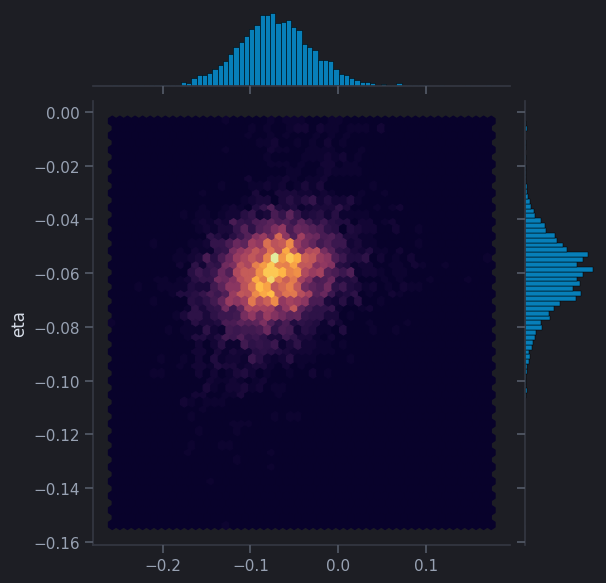

In [22]:
sns.jointplot(x=yhat, y=y['eta'], kind='hex', cmap='rho_heatmap')

In [57]:
yhat = cross_val_predict(pipe, feats, y['eta'], cv=5)

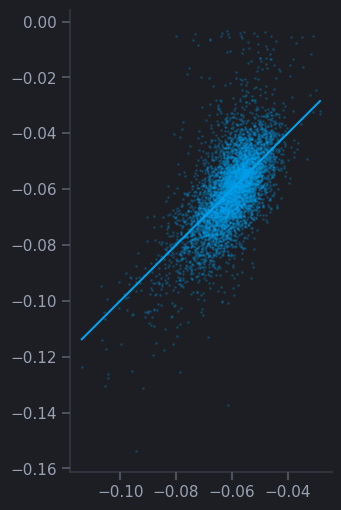

In [59]:
plt.scatter(yhat, y['eta'], ec=None, alpha=0.2, s=1)
plt.gca().set_aspect('equal')
plt.plot((yhat.min(), yhat.max()), (yhat.min(), yhat.max()))

In [ ]:
from wat import wat
pd.Series(index=feats.columns, data=pipe.named_steps['selectpercentile'].scores_).sort_values()

jml_C-3                             0.000000
jml_C-5                             0.000000
jml_C-9                             0.000000
jml_nfunfill                        0.000000
jml_nn_5                            0.000000
                                     ...    
jml_first_ion_en_mult_elec_aff    669.275715
jml_elec_aff_subs_atom_rad        679.789312
jml_atom_rad_subs_elec_aff        679.789312
jml_elec_aff_add_X                685.848577
jml_elec_aff_mult_X               685.892806
Length: 1557, dtype: float64

In [ ]:
sns.relplot()